Alejandro Figueroa Ramírez              
CIIC5015 - Project 2
841-17-2484
Dr. Manuel Rodriguez

In [1]:
# Importing dependencies
import torch
import torchvision as tv
import torchinfo
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [40]:
# Importing dataset

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#Missing values dropped
dataset = dataset.dropna()

#Encode values into a column due to the Origin column originally being categoric, not numeric
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [41]:
feature_train = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(feature_train.index)

labels = torch.tensor(feature_train.pop('MPG'), dtype=torch.float32)
features = torch.tensor(feature_train.values, dtype=torch.float32)

feat_norm = torch.nn.functional.normalize(features, dim=0)
label_norm = torch.nn.functional.normalize(labels, dim=0)


In [42]:
class AutoMPGDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

dataset = AutoMPGDataset(feat_norm, label_norm)
# trainset = AutoMPGDataset(feat_norm, )

batch_size = 32

trainloader = torch.utils.data.DataLoader(dataset=dataset, 
            batch_size=batch_size, shuffle=True)

In [54]:
import torch.nn as nn

# Class for basic regression neural network
class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(9, 1, bias=True)
        self.relu1 = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu1(out)
        return out
    

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


C:\Users\aj824\AppData\Local\Temp\ipykernel_23896\4286607919.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))


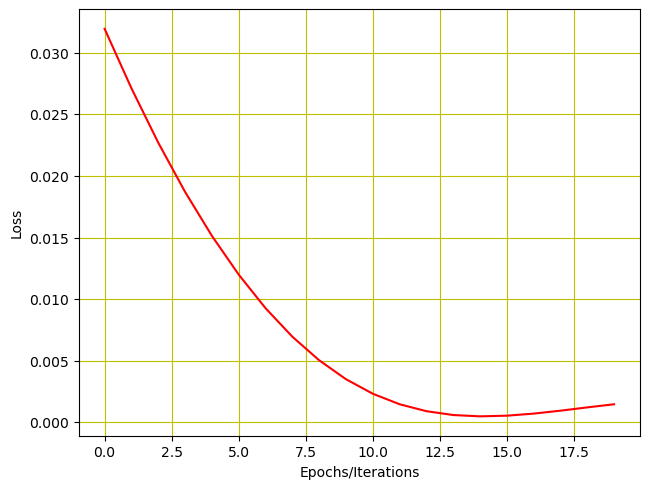

In [55]:
# Training loop for third neural network
lost_list = []
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()   
    # Forward pass
    y_pred = model.forward(feat_norm)

    # Compute loss
    loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))
    lost_list.append(loss.item())
    # Backward pass
    loss.backward()
    optimizer.step()


plt.plot(lost_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [49]:
# Class for 4 layer Neural Network
class RegressionModel2(torch.nn.Module):
    def __init__(self):
        super(RegressionModel2, self).__init__()
        self.fc1 = nn.Linear(9, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 20)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(20, 10)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x
    

model2 = RegressionModel2()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)

C:\Users\aj824\AppData\Local\Temp\ipykernel_23896\1462817003.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([314])) that is different to the input size (torch.Size([314, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


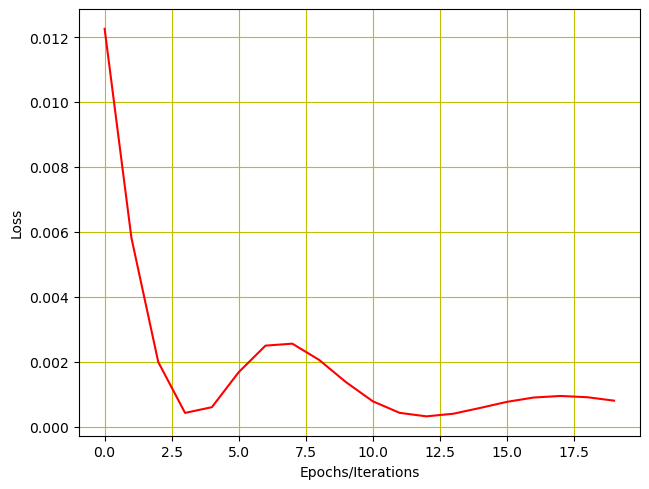

In [50]:
# Training loop for third neural network
lost_list = []
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()   
    # Forward pass
    y_pred = model2.forward(feat_norm)

    # Compute loss
    loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))
    lost_list.append(loss.item())
    # Backward pass
    loss.backward()
    optimizer.step()


plt.plot(lost_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

In [51]:
# Class for five layer Neural Network
class RegressionModel3(torch.nn.Module):
    def __init__(self):
        super(RegressionModel3, self).__init__()
        self.fc1 = nn.Linear(9, 10)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(10, 20)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(20, 30)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(30, 20)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        x = self.relu4(x)
        x = self.fc5(x)
        return x
    

model3 = RegressionModel3()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.01)

C:\Users\aj824\AppData\Local\Temp\ipykernel_23896\3931913468.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))
c:\Users\aj824\anaconda3\envs\pt2\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([314])) that is different to the input size (torch.Size([314, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


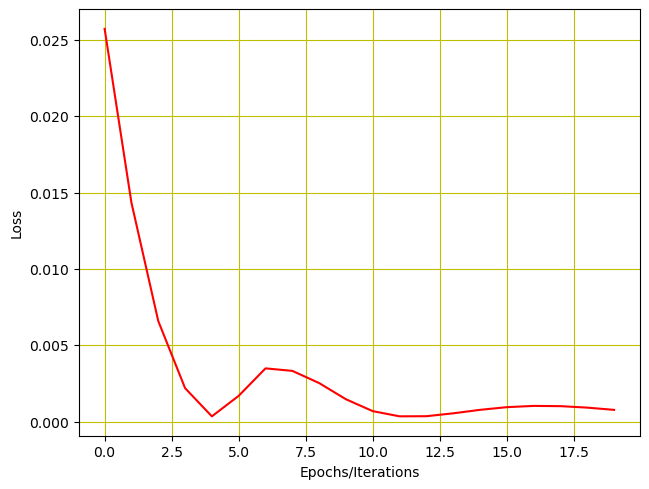

In [52]:
# Training loop for third neural network
lost_list = []
num_epochs = 20
for epoch in range(num_epochs):
    optimizer.zero_grad()   
    # Forward pass
    y_pred = model3.forward(feat_norm)

    # Compute loss
    loss = criterion(y_pred, torch.tensor(label_norm, dtype= torch.float32))
    lost_list.append(loss.item())
    # Backward pass
    loss.backward()
    optimizer.step()


plt.plot(lost_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()